# NLP<sup>Natural Language Processing</sup>

NLP는 Natural Language Processing의 약자로, 자연어 처리를 의미한다.  
스팸, 뉴스/쇼핑 카테고리 분류, 텍스트 요약, 문장 생성, 기계 번역, 챗봇 등 다양한 분야에서 활용

# 자연어 처리 방법

## 토큰화(문장을 띄어쓰기 기준으로 나눔) + 단어 사전(단어와 숫자 매칭)

In [1]:
# 텐서플로 토크나이저
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
# 토큰화(문장을 띄어쓰기 기준으로 나눔) + 단어 사전(단어와 숫자 매칭)
sentences = [
    '영실이는 나를 정말 정말 좋아해',
    '영실이는 영화를 좋아해'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
print("단어 인덱스 : ", tokenizer.word_index)

단어 인덱스 :  {'영실이는': 1, '정말': 2, '좋아해': 3, '나를': 4, '영화를': 5}


Tokenizer은 띄어쓰기 기준으로 단어 인코딩 사전을 생성한다.  
단어 인코딩 사전의 순서는 단어의 빈도수 + 먼저 나온 순서이다.

## 문자 인코딩(사전을 바탕으로 문자들을 숫자로 변경)

In [3]:
# 문자 인코딩(사전을 바탕으로 문자들을 숫자로 변경)
word_encoding = tokenizer.texts_to_sequences(sentences)
word_encoding

[[1, 4, 2, 2, 3], [1, 5, 3]]

입력된 문자를 단어 인덱스를 사용하여 숫자 벡터로 변환

### 사전에 없는 단어를 포함하는 문자 인코딩

In [4]:
# 사전에 없는 단어가 있을 때 인코딩 결과
new_sentences = ['영실이는 경록이와 나를 좋아해']
new_word_encoding = tokenizer.texts_to_sequences(new_sentences)
new_word_encoding

[[1, 4, 3]]

자연어에는 사전에 없는 단어가 등장할 수 있다. 이러한 단어를 OOV<sup>Out Of Vocabulary</sup> token이라 부른다.  
Tokenizer는 oov_token이라는 파라미터를 이용해 사전에 없는 단어를 처리할 수 있다.

In [31]:
# 사전에 없는 OOV(Out Of Vocabulary) 단어 처리
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

new_word_encoding = tokenizer.texts_to_sequences(new_sentences)

print(word_index)
print(new_word_encoding)

{'<OOV>': 1, '영실이는': 2, '정말': 3, '좋아해': 4, '나를': 5, '영화를': 6}
[[2, 1, 5, 4]]


위의 결과를 보면 사전에 없는 단어 `경록이와`가 `1`로 변환된 것을 확인할 수 있다.  
이와 같은 방식으로 사전에 없는 단어를 숫자로 변경할 수 있다.

### 빈도수 적은 단어 제외시키기

텍스트 데이터에는 빈도수가 작은 단어가 다수 존재하는 경우에는 이러한 단어들을 제외하는 것이 일반적이다.  
이를 위해 인코딩할 때, 사전의 단어의 개수를 제한하여 빈도수가 적은 단어들을 제외시키는 방법을 사용한다.

In [6]:
# 단어 사전 개수 설정
tokenizer = Tokenizer(num_words=3, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

new_word_encoding = tokenizer.texts_to_sequences(new_sentences)

print(word_index)
print(new_word_encoding)

{'<OOV>': 1, '영실이는': 2, '정말': 3, '좋아해': 4, '나를': 5, '영화를': 6}
[[2, 1, 1, 1]]


`num_words`를 어떠한 숫자로 설정해도 전체에 대한 단어 인코딩 사전이 만들어지고 해당 사전에서 설정한 숫자 만큼만 단어 사전에서 활용된다.

## 문장의 길이(크기)를 일정하게 맞추기(패딩<sup>Padding</sup>)

순환신경망(RNN)에 데이터를 입력하기 위해서는 문장의 길이(크기)를 일정하게 변경하여야한다.  
이를 패딩<sup>Padding</sup>이라 부른다.

In [32]:
word_encoding = tokenizer.texts_to_sequences(sentences)
word_encoding

[[2, 5, 3, 3, 4], [2, 6, 4]]

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(word_encoding)
print(padded)

[[2 5 3 3 4]
 [0 0 2 6 4]]


앞에서부터 0을 채우는 padding의 값은 `pre`로 default값이다.  
뒤에서부터 0을 채우고 싶다면, padding의 값을 `post`로 변경해주자.

### 최대 길이 제한

최대 길이는 `maxlen`으로 제한해준다.

In [9]:
padded = pad_sequences(word_encoding, padding='post', maxlen=4)
print(padded)

[[1 1 1 1]
 [2 1 1 0]]


### 최대 길이 이상의 문장 자르는 기준 바꾸기

기본적으로 최대 길이 이상의 문장을 자를 때는 앞에서부터 자른다.  
하지만, 뒤에서부터 자르고 싶다면, truncation의 파라미터를 `post`로 변경해주면 된다.

In [34]:
# 최대 길이보다 문장이 길 때 뒷부분 자르기
padded = pad_sequences(word_encoding, padding='post', truncating='post', maxlen=4)
print(padded)

[[2 5 3 3]
 [2 6 4 0]]


# 한국어 감성분석

> **감성 분석<sup>Sentiment Analysis</sup>**  
> 텍스트에 들어있는 의견이나 감성, 평가, 태도 등의 주관적인 정보를 분석하는 과정

In [11]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')

사용할 데이터는 네이버 영화 리뷰 데이터이다.

In [12]:
# 데이터 불러오기
train_file = tf.keras.utils.get_file('ratings_train.txt', origin='https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', extract=True)
train = pd.read_csv(train_file, sep='\t')

14630912/14628807 [==============================] - 0s 0us/step


## EDA(탐색적 분석)

탐색적 분석<sup>Exploratory Data Analysis</sup>을 통한 데이터 크기, 인스턴스, 결측치 및 레이블 등을 확인한다.

In [13]:
# 데이터 크기 및 인스턴스 확인
print("train shape : ", train.shape)
train.head()

train shape :  (150000, 3)


id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

### Label 별 개수 확인하기
불균형이 심할 경우, 훈련이 제대로 이루어지기 힘들다.

In [14]:
# 레이블별 개수
cnt = train['label'].value_counts()
print(cnt)

0    75173
1    74827
Name: label, dtype: int64


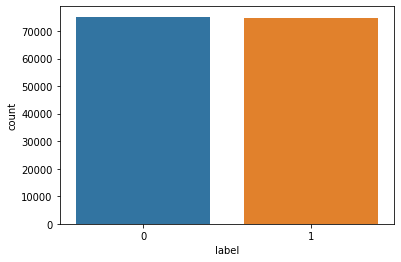

In [15]:
# 레이블별 비율
sns.countplot(x='label', data=train)

### 결측치 확인

In [16]:
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [17]:
# 결측치(의견없음)가 특정 label 값만 있는지 확인
train[train['document'].isnull()]

id document  label
25857   2172111      NaN      1
55737   6369843      NaN      1
110014  1034280      NaN      0
126782  5942978      NaN      0
140721  1034283      NaN      0

label 값이 일정하지 않기 때문에 의미가 없는 데이터로 판단

### 감정에 따른 데이터의 길이 차이 분석

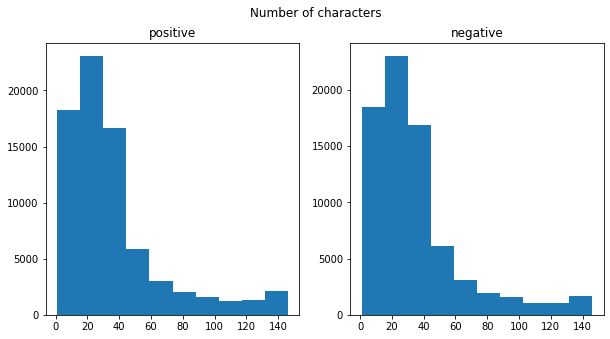

In [18]:
# 레이블별 텍스트 길이
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
data_len = train[train['label'] == 0]['document'].str.len()
ax1.hist(data_len)
ax1.set_title('positive')

data_len = train[train['label'] == 1]['document'].str.len()
ax2.hist(data_len)
ax2.set_title('negative')
fig.suptitle('Number of characters')
plt.show()

감정에 따른 길이의 차이는 명확하지 않으므로 분류에 있어서 중요한 정보가 될 수 없다.

## 형태소 분석기 불러오기

자연어 처리에서 말하는 형태소 분석이란, 어떤 대상 어절을 최소의 의미 단위인 '형태소'로 분석하는 것을 의미  
한국어 형태소 분석기 : Kkma, Komoran, Okt, Mecab 등

### Colab 환경에서 Mecab 설치하기

In [20]:
# Mecab 형태소 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [21]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [22]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 38.3 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-21 00:58:30--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=bhbNfPj3hl2EwROL4i%2BlPjIjsjk%3D

### 형태소 분석기 생성

Kkma, Komoran, Okt, Mecab 형태소 분석기를 생성하고 각 분석기를 적용해 형태소를 분리해보자

In [23]:
#Kkma, Komoran, Okt, Mecab 형태소
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Mecab
kkma = Kkma()
komoran = Komoran()
okt = Okt()
mecab = Mecab()

In [24]:
# 형태소별 샘플
text = "영실아안녕오늘날씨어때?"

def sample_ko_pos(text):
  print(f"===={text}====")
  print("kkma:",kkma.pos(text))
  print("komoran:", komoran.pos(text))
  print("okt:", okt.pos(text))
  print("mecab:", mecab.pos(text))

sample_ko_pos(text)

====영실아안녕오늘날씨어때?====
kkma: [('영', 'MAG'), ('싣', 'VV'), ('아', 'ECD'), ('안녕', 'NNG'), ('오늘날', 'NNG'), ('씨', 'VV'), ('어', 'ECD'), ('때', 'NNG'), ('?', 'SF')]
komoran: [('영', 'NNP'), ('실', 'NNP'), ('아', 'NNP'), ('안녕', 'NNP'), ('오늘날', 'NNP'), ('씨', 'NNB'), ('어떻', 'VA'), ('어', 'EF'), ('?', 'SF')]
okt: [('영', 'Modifier'), ('실아', 'Noun'), ('안녕', 'Noun'), ('오늘날', 'Noun'), ('씨', 'Suffix'), ('어때', 'Adjective'), ('?', 'Punctuation')]
mecab: [('영실', 'NNG'), ('아', 'IC'), ('안녕', 'IC'), ('오늘', 'MAG'), ('날씨', 'NNG'), ('어때', 'VA+EF'), ('?', 'SF')]


띄어쓰기가 되어있지 않을 때는 형태소 분석이 어렵지만,  Mecab에서는 제대로 된 결과를 보여주었다.

In [25]:
text2 = "영실아안뇽오늘날씨어때?"
sample_ko_pos(text2)

====영실아안뇽오늘날씨어때?====
kkma: [('영', 'MAG'), ('싣', 'VV'), ('아', 'ECD'), ('안', 'MAG'), ('뇽', 'UN'), ('오늘날', 'NNG'), ('씨', 'NNB'), ('어', 'VV'), ('어', 'ECS'), ('때', 'NNG'), ('?', 'SF')]
komoran: [('영실아안뇽오늘날씨어때?', 'NA')]
okt: [('영', 'Modifier'), ('실아', 'Noun'), ('안뇽', 'Noun'), ('오늘날', 'Noun'), ('씨', 'Suffix'), ('어때', 'Adjective'), ('?', 'Punctuation')]
mecab: [('영실', 'NNG'), ('아안', 'NNG'), ('뇽오늘날씨어때', 'UNKNOWN'), ('?', 'SF')]


`안뇽`이라는 단어와 같은 신조어 또는 맞춤법이 틀린 단어는 Okt 이외에는 제대로 분리하지 못하였다.

In [26]:
text3 = "정말 재미있고 매력적인 영화에요 추천합니다."
sample_ko_pos(text3)

====정말 재미있고 매력적인 영화에요 추천합니다.====
kkma: [('정말', 'MAG'), ('재미있', 'VA'), ('고', 'ECE'), ('매력적', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETD'), ('영화', 'NNG'), ('에', 'JKM'), ('요', 'JX'), ('추천', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
komoran: [('정말', 'MAG'), ('재미있', 'VA'), ('고', 'EC'), ('매력', 'NNG'), ('적', 'XSN'), ('이', 'VCP'), ('ㄴ', 'ETM'), ('영화', 'NNG'), ('에', 'JKB'), ('요', 'JX'), ('추천', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EF'), ('.', 'SF')]
okt: [('정말', 'Noun'), ('재미있고', 'Adjective'), ('매력', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('영화', 'Noun'), ('에요', 'Josa'), ('추천', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation')]
mecab: [('정말', 'MAG'), ('재미있', 'VA'), ('고', 'EC'), ('매력', 'NNG'), ('적', 'XSN'), ('인', 'VCP+ETM'), ('영화', 'NNG'), ('에', 'JKB'), ('요', 'MM'), ('추천', 'NNG'), ('합니다', 'XSV+EF'), ('.', 'SF')]


위의 데이터와 같이 정확한 띄어쓰기와 문법으로 작성된 텍스트 데이터를 사용한다면 높은 정확도의 형태소 분리 결과를 얻을 수 있다.

대용량 데이터에서는 데이터를 처리하는 속도 또한 모델을 평가하는 중요한 요소로 작용하며,  
kkma < komoran < okt < mecab 의 순서대로 빠른 처리 속도를 보여주었다.

## 데이터 전처리

### 특수문자 및 숫자 제거

In [27]:
# 텍스트 전처리(영어와 한글만 남기고 삭제)
train['document'] = train['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]","")
train['document'].head()

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: document, dtype: object

### 결측치 삭제
[결측치 확인](#결측치-확인)에서 의미가 없다고 판단한 `document` column에 결측치를 가진 인스턴스들을 삭제한다.



In [28]:
# 결측치 제거
train = train.dropna()
train.shape

(149995, 3)

### 불용어 제거
stop word는 불용어를 뜻하며, 일반적으로 사용하지 않는 단어, 관사, 전치사, 조사, 접속사 등의 의미가 없는 단어를 제거한다. 

In [29]:
# stop word와 형태소 분석(한국어 불용어)
def word_tokenization(text):
  stop_words=['는', '을', '를', '이', '가', '의', '던', '고', '하', '다', '은', '에', '들', '지', '게', '도']
  return [word for word in mecab.morphs(text) if word not in stop_words]

In [30]:
data = train['document'].apply(lambda x : word_tokenization(x))
data.head()

0                        [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1       [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]
2                              [너무, 재, 밓었다그래서보는것을추천한다]
3                   [교도소, 이야기, 구먼, 솔직히, 재미, 없, 평점, 조정]
4    [사이몬페그, 익살, 스런, 연기, 돋보였, 영화, 스파이더맨, 에서, 늙, 어, ...
Name: document, dtype: object

### 네이버 영화 리뷰 데이터 토큰화

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# voca_size 설정
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
print("총 단어 개수 :", len(tokenizer.word_index))
# 5회 이상만 vocab_size에 포함
def get_vocab_size(threshold):
  cnt = 0
  for x in tokenizer.word_counts.values():
    if x >= threshold:
      cnt = cnt + 1
  return cnt

vocab_size = get_vocab_size(5)
print("vocab_size:", vocab_size)

총 단어 개수 : 52171
vocab_size: 15568


문장들을 단어로 나누고 단어의 개수가 5개 이상인 것만 사용한다.  
사전에 없는 단어 또한 처리한다.

In [38]:
oov_tok='<OOV>'

tokenizer = Tokenizer(oov_token=oov_tok, num_words=vocab_size)
tokenizer.fit_on_texts(data)
print(tokenizer.word_index)
print('총 단어 개수 :', len(tokenizer.word_counts))

{'<OOV>': 1, '영화': 2, '보': 3, '한': 4, '있': 5, '없': 6, '좋': 7, '나': 8, '었': 9, '만': 10, '는데': 11, '너무': 12, '봤': 13, '적': 14, '안': 15, '정말': 16, '로': 17, '음': 18, '으로': 19, '것': 20, '재밌': 21, '아': 22, '네요': 23, '어': 24, '지만': 25, '같': 26, '진짜': 27, '에서': 28, '했': 29, '기': 30, '네': 31, '점': 32, '않': 33, '거': 34, '았': 35, '수': 36, '되': 37, '면': 38, 'ㅋㅋ': 39, '과': 40, '인': 41, '말': 42, '연기': 43, '잘': 44, '최고': 45, '주': 46, '내': 47, '평점': 48, '이런': 49, '와': 50, '어요': 51, '할': 52, '왜': 53, '겠': 54, '스토리': 55, 'ㅋㅋㅋ': 56, '습니다': 57, '해': 58, '듯': 59, '아니': 60, '드라마': 61, '생각': 62, '더': 63, '그': 64, '싶': 65, '사람': 66, '감동': 67, '때': 68, '함': 69, '배우': 70, '본': 71, '까지': 72, '좀': 73, '뭐': 74, '볼': 75, '알': 76, '만들': 77, '내용': 78, '보다': 79, '감독': 80, '라': 81, '재미': 82, '그냥': 83, '시간': 84, '재미있': 85, '지루': 86, '중': 87, '잼': 88, '재미없': 89, '였': 90, '년': 91, '쓰레기': 92, '사랑': 93, '못': 94, '냐': 95, '서': 96, '라고': 97, '니': 98, '면서': 99, '다시': 100, '번': 101, '나오': 102, '하나': 103, '작품': 104, '야': 105, '이

사전에 모든 단어는 들어가지만 단어의 개수가 5개 이상인 것만 사용되도록 num_words를 설정하였다.

In [42]:
# 문자를 숫자로 변환
sequences = tokenizer.texts_to_sequences(data)
sequences[:2]

[[22, 63, 913, 27, 214, 8, 23, 706],
 [975, 486, 495, 638, 2, 107, 1572, 43, 878, 960, 33, 363]]

### 네이버 영화 리뷰 패딩<sup>Padding</sup>

모든 리뷰 데이터의 길이를 똑같이 맞추기 위해, 먼저 최대 길이를 찾아야한다.

In [44]:
# 문장의 최대 길이
max_length = max(len(x) for x in sequences)
print('문장 최대 길이 : ', max_length) 

문장 최대 길이 :  74


문장의 최대 길에 맞춰 문장의 뒷 부분을 0으로 채워주거나 잘라주는 패딩<sup>Padding</sup> 작업을 실행한다.

In [47]:
# 문장 길이를 동일하게 맞춘다.
trunc_type = 'post'
padding_type = 'post'

data_padded = pad_sequences(sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)

data_labels = np.asarray(train['label'])

print("Sample : ", data_padded[:1])

Sample :  [[ 22  63 913  27 214   8  23 706   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]


## 모델<sup>Model</sup>

  - 임베딩 레이어<sup>Embedding Layer</sup> : 정수 인덱스에서 고밀도 벡터로 매핑되어 단어 간의 유사성을 함께 인코딩
  - 양방향 LSTM 레이어<sup>Bidirectional LSTM Layer</sup> : 두 개 이상의 LSTM 레이어를 쌓기 위해서는 전체 시퀀스 출력이 필요하기 때문에 return_sequences 파라미터를 True로 해준다.
  - 

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

def create_model():
  model = Sequential([
      Embedding(vocab_size, 32),
      Bidirectional(LSTM(16, return_sequences = True)),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          498176    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 32)          6272      
_________________________________________________________________
dense_2 (Dense)              (None, None, 32)          1056      
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           33        
Total params: 505,537
Trainable params: 505,537
Non-trainable params: 0
_________________________________________________________________
